### DATA EXPLORATION

The aim of this notebook is to explore and analyze existing root growing data, which was collected manually and processed in WinRHIZO application. 

Forestry stations:<BR>
HYYTIÄLÄ: H1, H2 and H3<BR>
VÄRRIÖ: V1 and V2


In [110]:
# IMPORT LIBRARIES

import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

# SETTINGS FOR PLOTTING

sns.set(rc={'figure.figsize':(15,10)})
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":5})   
sns.set(font_scale=1.2)
sns.set_style("whitegrid") 


In [111]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;

In [112]:
# READ DATA FILES AND SELECT ONLY NEEDED COLUMNS

file_V2 = pd.read_csv('V2_detail.csv', engine='python', parse_dates=['Date'], 
                      usecols=['SampleId','RootName','Experiment','Date','TotLength(cm)','TipDiam','Pioneer','Fibrous'])
file_V3 = pd.read_csv('V3_detail.csv', engine='python', parse_dates=['Date'], 
                      usecols=['SampleId','RootName','Experiment','Date','TotLength(cm)','TipDiam','Pioneer','Fibrous'])
file_H1 = pd.read_csv('H1_detail.csv', engine='python', parse_dates=['Date'], 
                      usecols=['SampleId','RootName','Experiment','Date','TotLength(cm)','TipDiam','Pioneer','Fibrous'])
file_H2 = pd.read_csv('H2_detail.csv', engine='python', parse_dates=['Date'], 
                      usecols=['SampleId','RootName','Experiment','Date','TotLength(cm)','TipDiam','Pioneer','Fibrous'])
file_H3 = pd.read_csv('H3_detail.csv', engine='python', parse_dates=['Date'], 
                      usecols=['SampleId','RootName','Experiment','Date','TotLength(cm)','TipDiam','Pioneer','Fibrous'])

In [113]:
print(f'Scanner V2: {file_V2.shape[0]} images\nScanner V3: {file_V3.shape[0]} images\nScanner H1: {file_H1.shape[0]} images\nScanner H2: {file_H2.shape[0]} images\nScanner H3: {file_H3.shape[0]} images\n')

Scanner V2: 48945 images
Scanner V3: 49812 images
Scanner H1: 112064 images
Scanner H2: 37250 images
Scanner H3: 58091 images



In [114]:
# CONCATENATE DATAFRAMES TO ONE

df_ALL = pd.concat([file_V2, file_V3, file_H1, file_H2, file_H3], ignore_index=True)

In [115]:
df_ALL.head()

,SampleId,RootName,Experiment,Date,TotLength(cm),TipDiam,Pioneer,Fibrous
0,VS2_T001_L001_2018.07.06_033103_002_DYY.jpg,R1,VS2,2018-07-06,0.22,0.635,Y,N
1,VS2_T001_L001_2018.07.07_033103_003_DYY.jpg,R1,VS2,2018-07-07,0.30,0.635,Y,N
2,VS2_T001_L001_2018.07.08_033103_004_DYY.jpg,R1,VS2,2018-07-08,0.53,0.635,Y,N
3,VS2_T001_L001_2018.07.09_033103_005_DYY.jpg,R1,VS2,2018-07-09,0.72,0.635,Y,N
4,VS2_T001_L001_2018.07.10_033103_006_DYY.jpg,R1,VS2,2018-07-10,1.12,0.635,Y,N


In [116]:
# FUNCTION TO CREATE ROOT TYPE COLUMN INSTEAD OF COLUMNS "PIONEER" AND "FIBROUS"

def rootType (type1, type2):
    if type1 == "Y":
        r_type = "P"
    elif type2 == "Y":
        r_type = "F"
    else:
        r_type = "Unknown"
    return r_type


In [119]:
df_ALL['RootType'] = df_ALL.apply(lambda row: rootType(row['Pioneer'], row['Fibrous']), axis=1)

In [120]:
df_ALL = df_ALL.drop(['Pioneer','Fibrous' ], axis=1)

In [121]:
# CALCULATE THE QUANTITY OF ROOTS PER IMAGE, P = PIONEER ROOT, F = FIBROUS

df_ALL.groupby(['SampleId','RootType'])['RootName'].count().to_frame()

,,RootName
SampleId,RootType,
VS2_T001_L001_2018.07.06_033103_002_DYY.jpg,P,1
VS2_T001_L001_2018.07.07_033103_003_DYY.jpg,P,1
VS2_T001_L001_2018.07.08_033103_004_DYY.jpg,P,1
VS2_T001_L001_2018.07.09_033103_005_DYY.jpg,P,1
VS2_T001_L001_2018.07.10_033103_006_DYY.jpg,P,2
VS2_T001_L001_2018.07.11_033103_007_DYY.jpg,P,2
VS2_T001_L001_2018.07.12_033103_008_DYY.jpg,P,2
VS2_T001_L001_2018.07.13_033103_009_DYY.jpg,P,2
VS2_T001_L001_2018.07.14_033103_010_DYY.jpg,P,2


In [127]:
df_ALL.head()

,SampleId,RootName,Experiment,Date,TotLength(cm),TipDiam,RootType,Change(cm)
0,VS2_T001_L001_2018.07.06_033103_002_DYY.jpg,R1,VS2,2018-07-06,0.22,0.635,P,0.00
1,VS2_T001_L001_2018.07.07_033103_003_DYY.jpg,R1,VS2,2018-07-07,0.30,0.635,P,0.08
2,VS2_T001_L001_2018.07.08_033103_004_DYY.jpg,R1,VS2,2018-07-08,0.53,0.635,P,0.23
3,VS2_T001_L001_2018.07.09_033103_005_DYY.jpg,R1,VS2,2018-07-09,0.72,0.635,P,0.19
4,VS2_T001_L001_2018.07.10_033103_006_DYY.jpg,R1,VS2,2018-07-10,1.12,0.635,P,0.40


In [123]:
# CALCULATE DAILY GROWING SPEED FOR EACH ROOT
# FIRST SORT THE DATAFRAME AND THEN USE GROPUBY.DIFF()

df_ALL = df_ALL.sort_values(by=['Experiment', 'RootName', 'Date'])
df_ALL['Change(cm)'] = df_ALL.groupby(['Experiment', 'RootName'])['TotLength(cm)'].diff().fillna(0)

In [130]:
# CALCULATE AVERAGE GROWING SPEED PER FORESTRY STATION

df_plot = df_ALL.groupby(['Date', 'Experiment'])['Change(cm)'].mean().to_frame()

In [135]:
df_plot.reset_index(inplace=True)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

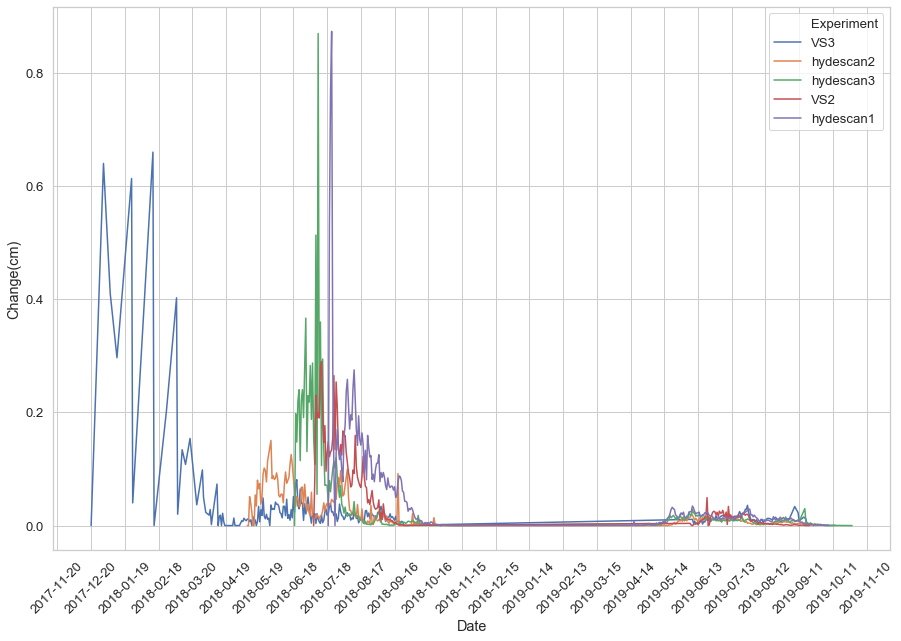

In [136]:
# PLOT DATAFRAME

import matplotlib.dates as mdates

x = df_plot['Date']
y1 = df_plot['Change(cm)']

fig, ax = plt.subplots()
plt.xticks(rotation=45)

ax = sns.lineplot(data = df_plot, x=x, y=y1, ci=None, hue='Experiment')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))

plt.show() 

fig = ax.get_figure()
fig.savefig("Forestry stations.png", dpi = 300, bbox_inches='tight')

### NOTES:
- Column 'TotLength(cm)' has  mistakes, which results in negative growing speed (over 50 observation) 
- Changes over 0,6 cm do exist 

Text(0.5, 0, 'Change(cm)')

Text(0, 0.5, 'Amount')

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,
         1. ,  1.1]), <a list of 13 Text xticklabel objects>)

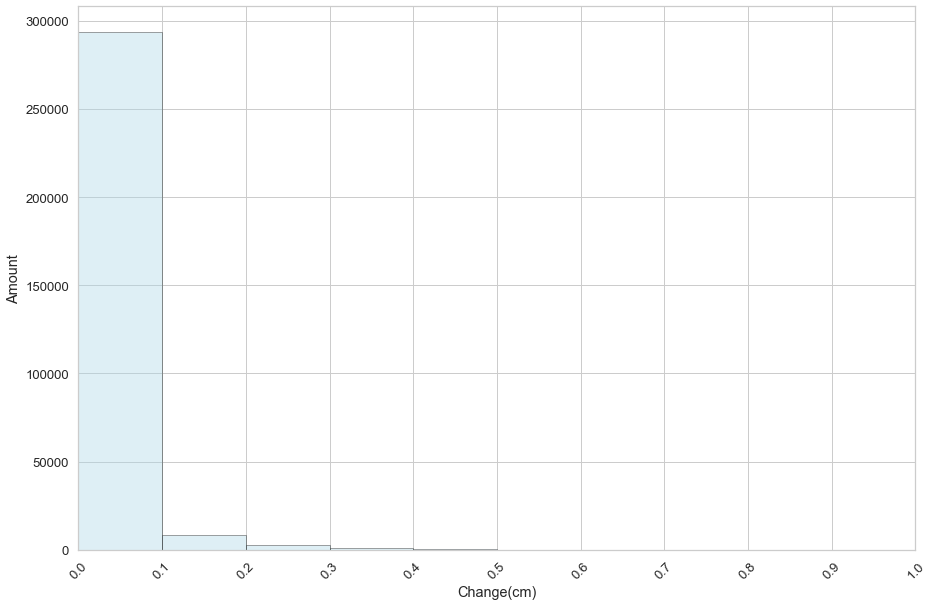

In [173]:
# JUST FOR TESTING

sns_hist = sns.distplot(df_ALL['Change(cm)'],
             kde=False,
             bins=10,
             color="lightblue",
             hist_kws={'linewidth':1, 'edgecolor':'k', 'range':(0,1)})

# Set or retrieve autoscaling margins
sns_hist.margins(x = 0)

# Setting the interval of x-axis
sns_hist.xaxis.set_major_locator(ticker.MultipleLocator(0.1))

plt.xlabel('Change(cm)')
plt.ylabel('Amount')
plt.xticks(rotation=45)

# Save the plot
fig = sns_hist.get_figure()
fig.savefig('Histogram.png', dpi = 300, bbox_inches='tight')

,SampleId,RootName,Experiment,Date,TotLength(cm),TipDiam,RootType,Change(cm)
1789,VS2_T001_L001_2018.07.24_153103_020_DYY.jpg,R11,VS2,2018-07-24,1.4300,0.2540,P,0.9200
2031,VS2_T001_L001_2019.07.09_092710_117_DYY.jpg,R111,VS2,2019-07-09,1.3900,0.5080,F,0.6700
4562,VS2_T001_L001_2018.09.06_033103_064_DYY.jpg,R128,VS2,2018-09-06,4.3500,0.6350,F,0.7300
6402,VS2_T001_L001_2018.07.31_033103_027_DYY.jpg,R14,VS2,2018-07-31,3.6700,0.2540,P,0.6400
6403,VS2_T001_L001_2018.08.01_033103_028_DYY.jpg,R14,VS2,2018-08-01,4.5300,0.2540,P,0.8600
6404,VS2_T001_L001_2018.08.02_033103_029_DYY.jpg,R14,VS2,2018-08-02,5.2700,0.2540,P,0.7400
6405,VS2_T001_L001_2018.08.03_033103_030_DYY.jpg,R14,VS2,2018-08-03,5.8700,0.2540,P,0.6000
6408,VS2_T001_L001_2018.08.06_033103_033_DYY.jpg,R14,VS2,2018-08-06,6.7900,0.2540,P,0.6500
10178,VS2_T001_L001_2018.08.26_033103_053_DYY.jpg,R164,VS2,2018-08-26,1.0400,0.5715,F,0.6000
12432,VS2_T001_L001_2018.08.01_033103_028_DYY.jpg,R18,VS2,2018-08-01,2.1000,1.0160,P,0.6400
